<a href="https://colab.research.google.com/github/Anna94652/FER_CNN/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy # Accuracy function will be used to measure accuracy of the model

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Getting FER2013 dataset
# Setup training data
train_data = datasets.FER2013(
    root = "data",
    split = "train",
    transform = ToTensor(),
    target_transform = None
)
# Setup test data
test_data = datasets.FER2013(
    root = "data",
    split = "test",
    transform = ToTensor(),
    target_transform = None
)

In [ ]:
!ls -l data

total 4
drwxr-xr-x 2 root root 4096 May 25 01:36 fer2013


In [ ]:
train_data

Dataset FER2013
    Number of datapoints: 28709
    Root location: data
    split=train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FER2013
    Number of datapoints: 7178
    Root location: data
    split=test
    StandardTransform
Transform: ToTensor()

In [ ]:
# Determine shape of our data and print out random image
image, label = train_data[125]
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
# (from the above, all our images are 1x48x48. So all of them are grayscale and 48x48 pixels)
# print(f"Image label: {class_names[label]}")
# 0 is angry, 3 is happy, 5 is surprised? Not sure what the meanings of the labels are there's no train_data.classes will figure this out later

Image shape: torch.Size([1, 48, 48]) -> [color_channels, height, width]


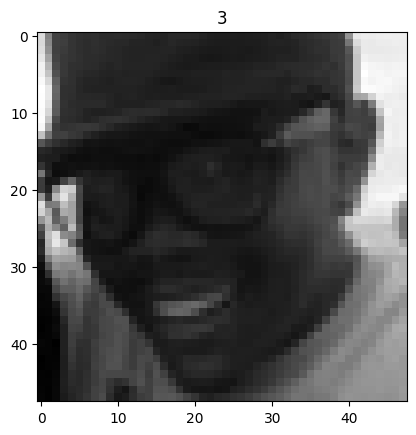

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label);

In [ ]:
BATCH_SIZE = 32
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE,
                              shuffle = True) # will shuffle the training data
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79a589e8df90>,
 <torch.utils.data.dataloader.DataLoader at 0x79a589db5650>)

In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79a589e8df90>, <torch.utils.data.dataloader.DataLoader object at 0x79a589db5650>)
Length of train_dataloader: 898 batches of 32...
Length of test_dataloader: 225 batches of 32...


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)

torch.Size([32, 1, 48, 48]) torch.Size([32])


In [ ]:
accuracy_fn = Accuracy(task="multiclass", num_classes=2).to(device)
accuracy_fn

MulticlassAccuracy()

In [ ]:
class EmotionsModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten layer will reduce shape of the input tensor
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)